<a href="https://colab.research.google.com/github/JMYoon90/JM_python/blob/main/py23_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mpg (Mile Per Gallon) 데이터 셋

* mpg 데이터 셋을 로드하고 탐색.
* mpg ~ displacement scatter plot
* 2x2 subplot을 생성. scatter plot.
    * mpg ~ cylinders
    * mpg ~ horsepower
    * mpg ~ weight
    * mpg ~ acceleration
* cylinders별 mpg 평균 막대 그래프
* cylinders별 mpg box plot
* origin별, cylinders별 mpg box plot
* origin별, cylinders별 mpg 평균 막대 그래프

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpg = sns.load_dataset('mpg')

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

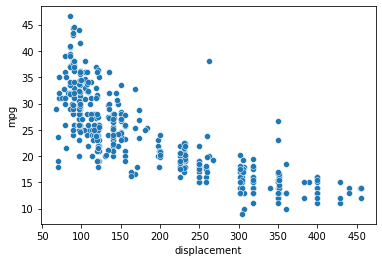

In [8]:
# mpg ~ displacement scatter plot
sns.scatterplot(data=mpg, x='displacement', y='mpg')
plt.show()

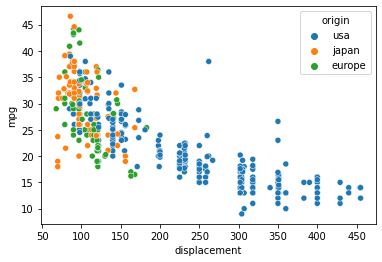

In [17]:
# mpg ~ displacement + origin
sns.scatterplot(data=mpg, x='displacement', y='mpg',  hue='origin')
plt.show()

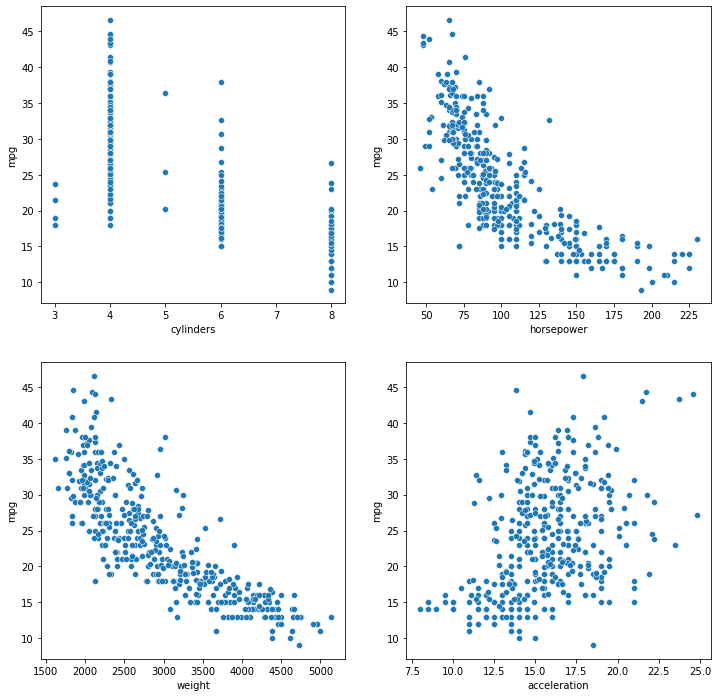

In [21]:
# 2x2 subplot을 생성. scatter plot.
# mpg ~ cylinders
# mpg ~ horsepower
# mpg ~ weight
# mpg ~ acceleration
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=ax[0, 0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=ax[0, 1])
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=ax[1, 0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=ax[1, 1])
plt.show()

In [22]:
mpg.groupby('cylinders')['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

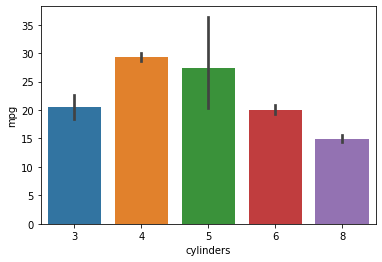

In [10]:
# cylinders별 mpg 평균 막대 그래프
sns.barplot(data=mpg, x='cylinders', y='mpg') # estimator=np.mean (기본값)
plt.show()

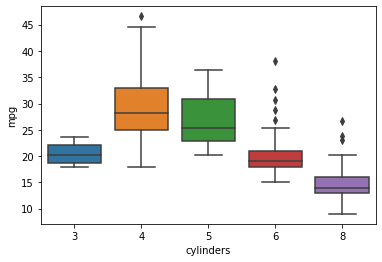

In [11]:
# cylinders별 mpg box plot
sns.boxplot(data=mpg, x='cylinders', y='mpg')
plt.show()

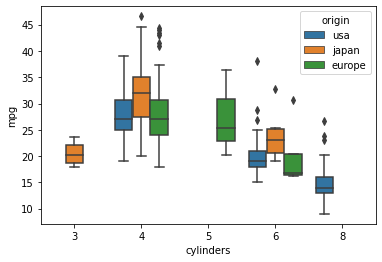

In [12]:
# origin별, cylinders별 mpg box plot
sns.boxplot(data=mpg, x='cylinders', y='mpg', hue='origin')
plt.show()

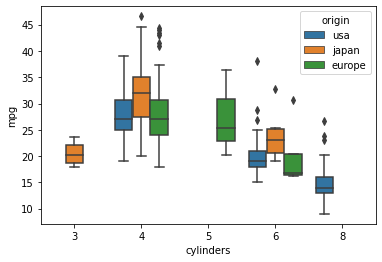

In [13]:
sns.boxplot(data=mpg, x='cylinders', y='mpg', hue='origin')
plt.show()

In [23]:
mpg.groupby(['origin', 'cylinders'])['mpg'].mean()

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

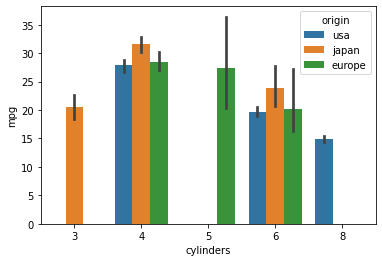

In [14]:
# origin별, cylinders별 mpg 평균 막대 그래프
sns.barplot(data=mpg, x='cylinders', y='mpg', hue='origin')
plt.show()